In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('Data.csv', header=0)

In [3]:
# Add 100 random synthetic data to the dataframe
for i in range(500):
  print(i)
  df = df.append(df.sample(n=1), ignore_index=True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [4]:
df.head()

,Timestamp,Year of birth,Sex,Marital Status,Region,Living alone?,number of people sharing the place with,Employment status,Industry,Income,...,Have debts,Debts repayment amount,Healthcare,Rent,Groceries,Utilities,Entertainment,Insurance,Unexpected expenses,Other expanses
0,3/22/2023 20:50:47,2000,Male,Single,Beirut,No,3.0,Employed,Computer and information technology,Between $1200 and $1500,...,No,NaN,0,0,0,0,100,0,0,0
1,3/22/2023 20:54:26,2000,Male,Single,Mount Lebanon,No,2.0,Employed,Computer and information technology,Between $1000 and $1200,...,No,NaN,0,0,150,200,100,0,0,0
2,3/22/2023 21:19:19,2003,Female,Single,Beirut,No,2.0,Not Employed,NaN,Between $0 and $300,...,No,NaN,50,500,1000,2000,1000,20,1000,500
3,3/22/2023 21:20:37,2004,Male,Single,Mount Lebanon,No,4.0,Not Employed,NaN,Between $0 and $300,...,No,NaN,40,0,300,150,50,40,20,30
4,3/22/2023 21:22:26,2000,Male,Single,Beirut,No,4.0,Employed,Computer and information technology,More than $1500,...,No,NaN,100,0,500,300,2000,200,100,100


In [5]:
df.drop(columns=['Timestamp'], inplace=True)
for col in df:
  if col != "Year of birth" and col != "number of people sharing the place with" and col != "Budget limit" and col != "Debts repayment amount" and col != "Healthcare" and col != "Rent" and col != "Groceries" and col != "Utilities" and col != "Entertainment" and col != "Insurance" and col != "Unexpected expenses" and col != "Other expanses":
    df[col], labels = df[col].factorize(sort=True)
  else:
    try:
      # Replace NaN values with 0
      if col == 'Debts repayment amount' or col == 'number of people sharing the place with' or col == 'Budget limit':
        df[col] = df[col].fillna(0)
      df[col], label = int(df[col])
    except:
      print('error')
    
# df.head()


error
error
error
error
error
error
error
error
error
error
error
error


In [6]:
df.corr()

,Year of birth,Sex,Marital Status,Region,Living alone?,number of people sharing the place with,Employment status,Industry,Income,Expenses,...,Have debts,Debts repayment amount,Healthcare,Rent,Groceries,Utilities,Entertainment,Insurance,Unexpected expenses,Other expanses
Year of birth,1.000000,-0.046871,0.026778,-0.287169,0.039606,0.110768,0.516684,-0.481485,-0.431413,-0.417898,...,0.095906,-0.171945,0.298611,-0.127855,0.020392,0.165561,-0.060680,0.012201,0.017452,0.243483
Sex,-0.046871,1.000000,0.225088,-0.259557,0.490104,-0.522759,0.069423,0.163734,-0.048640,0.095902,...,0.387244,0.353332,-0.203093,-0.135940,-0.157972,-0.193074,0.181169,0.160398,-0.234862,-0.186702
Marital Status,0.026778,0.225088,1.000000,-0.263340,0.165378,-0.206396,0.557754,0.312211,0.056799,0.058121,...,-0.096756,-0.090932,0.083496,0.274324,-0.019767,-0.009727,-0.082979,-0.103224,0.018100,-0.088780
Region,-0.287169,-0.259557,-0.263340,1.000000,-0.046074,-0.004093,-0.102779,-0.106722,-0.202612,-0.244182,...,0.019102,0.111533,-0.375244,-0.253113,-0.320902,-0.324809,-0.328358,-0.283674,-0.289952,-0.349845
Living alone?,0.039606,0.490104,0.165378,-0.046074,1.000000,-0.679743,0.347655,-0.208297,-0.411191,-0.047796,...,0.836085,0.772175,-0.057463,-0.046059,-0.170266,-0.187631,-0.141543,-0.108360,-0.171783,-0.082158
number of people sharing the place with,0.110768,-0.522759,-0.206396,-0.004093,-0.679743,1.000000,-0.176008,-0.017776,0.124956,-0.005431,...,-0.544115,-0.467868,0.448592,-0.291541,0.110155,0.076596,0.136129,0.168288,-0.046241,0.448083
Employment status,0.516684,0.069423,0.557754,-0.102779,0.347655,-0.176008,1.000000,-0.474217,-0.554755,-0.302347,...,0.156452,0.045932,0.269400,0.079899,0.075800,0.143837,-0.185168,-0.216987,0.090167,0.186224
Industry,-0.481485,0.163734,0.312211,-0.106722,-0.208297,-0.017776,-0.474217,1.000000,0.535460,0.315158,...,-0.244095,-0.111015,-0.303519,0.235922,-0.221008,-0.225880,-0.010969,-0.073700,-0.125520,-0.251993
Income,-0.431413,-0.048640,0.056799,-0.202612,-0.411191,0.124956,-0.554755,0.535460,1.000000,0.543499,...,-0.321323,-0.243496,-0.017840,0.291703,0.200003,-0.084753,0.337802,0.406339,0.030228,-0.265813
Expenses,-0.417898,0.095902,0.058121,-0.244182,-0.047796,-0.005431,-0.302347,0.315158,0.543499,1.000000,...,-0.003492,0.144807,0.029591,0.454047,0.452979,0.204410,0.656275,0.492962,0.289364,0.035728


In [7]:
# Split to feature and result cols
feature_cols = ['number of people sharing the place with', 'Employment status', 'Income', 'Marital Status', 'Industry']
result_cols = ['Expenses']
X = df[feature_cols]
y = df[result_cols]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [9]:
# define the model
model = Sequential()
model.add(Dense(128, input_shape=(5,), activation='relu'))  # input layer
model.add(Dense(64, activation='relu'))                     # hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))                                         # output layer

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=300)

# model = RandomForestRegressor()

# model.fit(X=X_train, y=y_train)

Epoch 1/300
4/4 [==============================] - 1s 3ms/step - loss: 2.7551
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 2.2862
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 2.0403
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 1.9007
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 1.8430
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 1.7821
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 1.7460
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 1.7161
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 1.6872
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 1.6784
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 1.6797
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 1.6507
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

In [10]:
print(X_test)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# # print(list(zip(y_test, y_pred)))
# print(y_test[:1])
# print(y_pred)


     number of people sharing the place with  Employment status  Income  \
486                                      2.0                  0       1   
73                                       2.0                  0       3   
349                                      2.0                  1       0   
86                                       2.0                  0       6   
457                                      7.0                  1       0   
..                                       ...                ...     ...   
40                                       0.0                  2       0   
379                                      3.0                  0       4   
504                                      7.0                  1       0   
442                                      2.0                  0       1   
216                                      2.0                  0       6   

     Marital Status  Industry  
486               0         3  
73                0         6  
349

[(array([2.0004396], dtype=float32), 2), (array([-0.00598799], dtype=float32), 0), (array([1.9940135], dtype=float32), 2), (array([0.44761682], dtype=float32), 0), (array([0.03351492], dtype=float32), 0), (array([0.01360215], dtype=float32), 0), (array([-0.00598799], dtype=float32), 0), (array([-0.03767542], dtype=float32), 0), (array([-0.00598799], dtype=float32), 0), (array([0.3295693], dtype=float32), 0), (array([-0.00079276], dtype=float32), 0), (array([1.9940135], dtype=float32), 2), (array([3.9493482], dtype=float32), 4), (array([0.9527972], dtype=float32), 1), (array([3.9996152], dtype=float32), 4), (array([-0.00079276], dtype=float32), 0), (array([0.3295693], dtype=float32), 0), (array([0.3295693], dtype=float32), 0), (array([0.3295693], dtype=float32), 0), (array([3.9996152], dtype=float32), 4), (array([0.3295693], dtype=float32), 0), (array([0.01428456], dtype=float32), 0), (array([0.00865038], dtype=float32), 0), (array([0.3295693], dtype=float32), 0), (array([2.0048456], dt

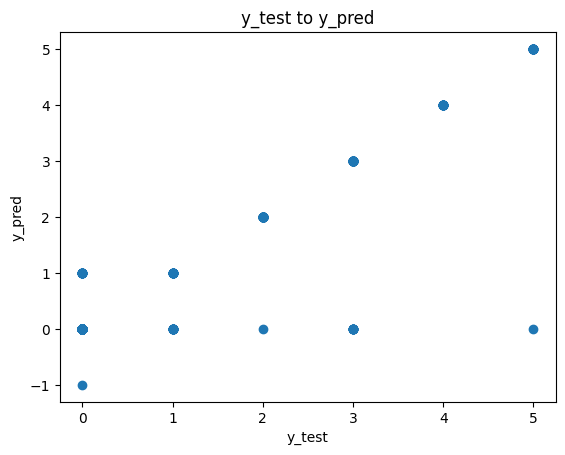

In [11]:
# round y_pred to the nearest integer

new_y_pred = [round(n - 0.05) for n in np.nditer(y_pred)]
print(list(zip(y_pred, new_y_pred)))
plt.scatter(y_test, new_y_pred, marker='o')
plt.title('y_test to y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [12]:
import pickle

# Save the model
filename = 'finalized_model_v2.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-06-10 12:19:15         3084
metadata.json                                  2023-06-10 12:19:15     

In [13]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,569
Trainable params: 21,569
Non-traina